In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_blobs

# from svm.soft_margin_svm import SoftMarginSVM
# from preprocessing.ohe import OneHotEncoder
# from linear_models.classification.softmax_regression import SoftMaxRegression
# from neighbors.knn_classifier import KNeighborsClassifier
# from linear_models.classification.logistic_regression import LogisticRegression
# from linear_models.regression.linear_regression import LinearRegression
# from linear_models.classification.least_squares_classifier import LeastSquareClassifier
# from classification.perceptron import Perceptron

In [2]:
def visualize_model(x_train, labels, model, degree = 1):
    f = plt.figure(figsize = (8,8))
    x1_min = np.min(x_train[:,0])
    x1_max = np.max(x_train[:,0])
    x2_min = np.min(x_train[:,1])
    x2_max = np.max(x_train[:,1])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                                   np.linspace(x2_min, x2_max, 100))
    x_test_poly = np.array([x1_test, x2_test]).reshape(2, -1).T
    y_test = model.predict(x_test_poly)

    flat_labels = labels.flatten()
    sns.scatterplot(data = x_train, x = x_train[:,0], y = x_train[:,1], hue = labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha = 0.5, levels = np.linspace(0,1,3))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.show()

In [3]:
from clustering.kmeans import KMeans

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers = 2, cluster_std=3, random_state= 42)
# sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = y)

In [5]:
km = KMeans(n_clusters = 2)
km.fit(X)

<AxesSubplot:>

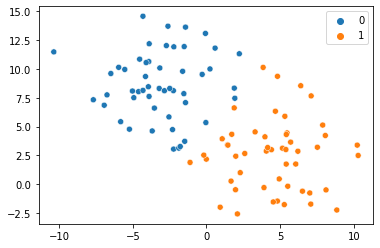

In [6]:
sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = y)

<AxesSubplot:>

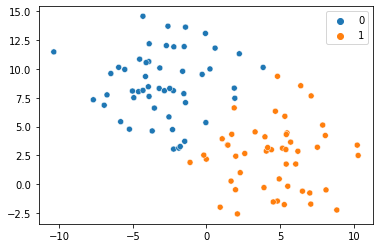

In [7]:
sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = km.labels)

In [8]:
# import numpy as np
# centroid = [[1,1,1],
#             [2,2,2],
#             [3,3,3]]
# X  = [[1,1,1],
#       [2,2,2],
#       [2.4,2.4,2.4]]
# d = cdist(X, centroid, metric='euclidean')
# classes = np.argmin(d, axis = 1)
# X = np.column_stack((X, classes))
# print(X)
# for i in range(len(np.unique(classes))):
#     print(np.mean(X[X[:, -1] == i][:,:-1], axis = 0))